<a href="https://colab.research.google.com/github/Nichlas0403/DL_Multi-Classification_Human-Emotion-Detection/blob/main/Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Recap of this notebook
This notebook attempt to create a convolutional neural network which is able to predict an emotion, given an image of a persons face.

Data
The data has been provided by kaggle
https://www.kaggle.com/ananthu017/emotion-detection-fer

In [ ]:
#Load tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from keras.preprocessing import image
import os
import random

#Image showcase

##Display image of each emotion

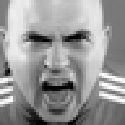

In [ ]:
#angry
image.load_img("/content/drive/MyDrive/Data Science, Machine Learning/Colab Notebooks/Deep Learning Projects/Image Recognition/Emotion Detection/Data/train/angry/im3.png",
               target_size=(125,125))

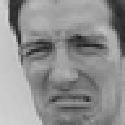

In [ ]:
#disgusted
image.load_img("/content/drive/MyDrive/Data Science, Machine Learning/Colab Notebooks/Deep Learning Projects/Image Recognition/Emotion Detection/Data/train/disgusted/im2.png",
               target_size=(125,125))

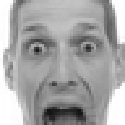

In [ ]:
#fearful
image.load_img("/content/drive/MyDrive/Data Science, Machine Learning/Colab Notebooks/Deep Learning Projects/Image Recognition/Emotion Detection/Data/train/fearful/im2.png",
               target_size=(125,125))

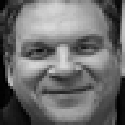

In [ ]:
#happy
image.load_img("/content/drive/MyDrive/Data Science, Machine Learning/Colab Notebooks/Deep Learning Projects/Image Recognition/Emotion Detection/Data/train/happy/im2.png",
               target_size=(125,125))

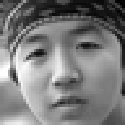

In [ ]:
#neutral
image.load_img("/content/drive/MyDrive/Data Science, Machine Learning/Colab Notebooks/Deep Learning Projects/Image Recognition/Emotion Detection/Data/train/neutral/im1.png",
               target_size=(125,125))

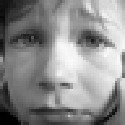

In [ ]:
#sad
image.load_img("/content/drive/MyDrive/Data Science, Machine Learning/Colab Notebooks/Deep Learning Projects/Image Recognition/Emotion Detection/Data/train/sad/im1.png",
               target_size=(125,125))

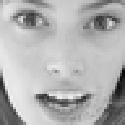

In [ ]:
#surprised
image.load_img("/content/drive/MyDrive/Data Science, Machine Learning/Colab Notebooks/Deep Learning Projects/Image Recognition/Emotion Detection/Data/train/surprised/im1.png",
               target_size=(125,125))

#Data augmentation

The follwing augmentation will be done to the data during training:
- rescale=1./255 rescales image
- rotation_range=40, randomly rotates 
- zoom_range=0.2, randomly zooms
- width_shift_range=0.2, randomly move pixels horizontally
- height_shift_range=0.2, randomly move pixels vertically
- horizontal_flip=True, randomly flips images horizontally
- fill_mode="nearest" fills missing pixels with their nearest neightbours

##Show augmented image

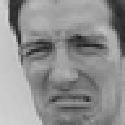

In [ ]:
#Original image
original = image.load_img("/content/drive/MyDrive/Data Science, Machine Learning/Colab Notebooks/Deep Learning Projects/Image Recognition/Emotion Detection/Data/train/disgusted/im2.png",
               target_size=(125,125))

original

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, #rescales image - this is done after augmentation
    rotation_range=40, #randomly rotates 
    zoom_range=0.2, #randomly zooms
    width_shift_range=0.2, #randomly move pixels horizontally
    height_shift_range=0.2, #randomly move pixels vertically
    horizontal_flip=True, #randomly flips images horizontallyt
    fill_mode="nearest" #fills missing pixels with their nearest neightbours
)

In [ ]:
aug_images = []
counter = 0
for batch in generator.flow(np.expand_dims(original,0),
                            batch_size=5,
                            save_format="jpeg",
                            seed=42):
  
  aug_images.append(batch)
  if len(aug_images) == 5:
    break

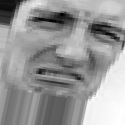

In [ ]:
image.array_to_img(np.squeeze(aug_images[0],axis=0))

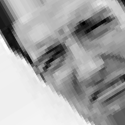

In [ ]:
image.array_to_img(np.squeeze(aug_images[1],axis=0))

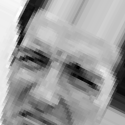

In [ ]:
image.array_to_img(np.squeeze(aug_images[2],axis=0))

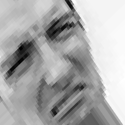

In [ ]:
image.array_to_img(np.squeeze(aug_images[3],axis=0))

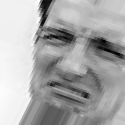

In [ ]:
image.array_to_img(np.squeeze(aug_images[4],axis=0))

#Iteration 1

##Data preparation


In [ ]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, #rescales image - this is done after augmentation
    rotation_range=40, #randomly rotates 
    zoom_range=0.2, #randomly zooms
    width_shift_range=0.2, #randomly move pixels horizontally
    height_shift_range=0.2, #randomly move pixels vertically
    horizontal_flip=True, #randomly flips images horizontallyt
    fill_mode="nearest" #fills missing pixels with their nearest neightbours
)

In [ ]:
X = train_gen.flow_from_directory(
    "/content/drive/MyDrive/Data Science, Machine Learning/Colab Notebooks/Deep Learning Projects/Image Recognition/Emotion Detection/Data/train",
    target_size=(224,224),
    color_mode="grayscale",
    batch_size=32,
    classes={'angry': 'angry',
             "disgusted":"disgusted",
             "fearful":"fearful",
             "happy":"happy",
             "neutral":"neutral",
             "sad":"sad",
             "surprised":"surprised"})

Found 28710 images belonging to 7 classes.


In [ ]:
validation_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [ ]:
val_data = validation_generator.flow_from_directory(
    "/content/drive/MyDrive/Data Science, Machine Learning/Colab Notebooks/Deep Learning Projects/Image Recognition/Emotion Detection/Data/test",
    target_size=(224,224),
    color_mode="grayscale",
    batch_size=32,
    classes={'angry': 1,
             "disgusted":"disgusted",
             "fearful":"fearful",
             "happy":"happy",
             "neutral":"neutral",
             "sad":"sad",
             "surprised":"surprised"})

Found 7178 images belonging to 7 classes.


##Modelling

###Create CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, GaussianNoise, Input
from keras import regularizers

In [ ]:
CNN = Sequential([
                  Input(shape=[224,224,1]),
                  GaussianNoise(0.1),
                  Conv2D(filters=32, kernel_size=3,activation="relu"),
                  BatchNormalization(),
                  MaxPool2D(pool_size=2, strides=2),
                  Conv2D(filters=32, kernel_size=3, activation="relu"),
                  BatchNormalization(),
                  MaxPool2D(pool_size=2, strides=2),
                  Conv2D(filters=32, kernel_size=3, activation="relu"),
                  BatchNormalization(),
                  MaxPool2D(pool_size=2, strides=2),
                  Flatten(),
                  Dense(units=4180, activation="relu"), 
                  Dropout(0.2),
                  Dense(units=4180, activation="relu"),
                  Dropout(0.2),
                  Dense(units=7, activation="softmax")
]
)

###Compile CNN

In [ ]:
CNN.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

###Train CNN

In [ ]:
CNN.fit(x=X, validation_data=val_data, epochs=25)

Epoch 1/25
898/898 [==============================] - 14455s 16s/step - loss: 6.4946 - accuracy: 0.2089 - val_loss: 8.1556 - val_accuracy: 0.2381
Epoch 2/25
898/898 [==============================] - 220s 244ms/step - loss: 1.8210 - accuracy: 0.2480 - val_loss: 5.7696 - val_accuracy: 0.2317
Epoch 3/25
898/898 [==============================] - 216s 240ms/step - loss: 1.8215 - accuracy: 0.2486 - val_loss: 1.8241 - val_accuracy: 0.2471
Epoch 4/25
898/898 [==============================] - 215s 240ms/step - loss: 1.8093 - accuracy: 0.2461 - val_loss: 3.3817 - val_accuracy: 0.1737
Epoch 5/25
898/898 [==============================] - 217s 242ms/step - loss: 1.8903 - accuracy: 0.2459 - val_loss: 2.2921 - val_accuracy: 0.2342
Epoch 6/25
898/898 [==============================] - 217s 242ms/step - loss: 1.8131 - accuracy: 0.2509 - val_loss: 2.1981 - val_accuracy: 0.1726
Epoch 7/25
898/898 [==============================] - 216s 240ms/step - loss: 1.8033 - accuracy: 0.2487 - val_loss: 2.5329 -

In [ ]:
CNN.save("/content/drive/MyDrive/Data Science, Machine Learning/Colab Notebooks/Deep Learning Projects/Image Recognition/Emotion Detection/Models/baseline_model")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Data Science, Machine Learning/Colab Notebooks/Deep Learning Projects/Image Recognition/Emotion Detection/Models/baseline_model/assets


###Evaluation 

The model is underfitting. I will try to increase the complexity of the model.

#Iteration 2 (increase complexity of the model)

Reduce input size of images to 64,64 and increase complexity of CNN by adding one additional dense layer.

##Data preparation

I will add the data augmentations to the loaded image. If this doesn't work, I might increase the size of the dataset using augmentations.

In [ ]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, #rescales image - this is done after augmentation
    rotation_range=40, #randomly rotates 
    zoom_range=0.2, #randomly zooms
    width_shift_range=0.2, #randomly move pixels horizontally
    height_shift_range=0.2, #randomly move pixels vertically
    horizontal_flip=True, #randomly flips images horizontallyt
    fill_mode="nearest" #fills missing pixels with their nearest neightbours
)

In [ ]:
X = train_gen.flow_from_directory(
    "/content/drive/MyDrive/Data Science, Machine Learning/Colab Notebooks/Deep Learning Projects/Image Recognition/Emotion Detection/Data/train",
    target_size=(64,64), #resize for faster training
    color_mode="grayscale",
    batch_size=32,
    classes={'angry': 'angry',
             "disgusted":"disgusted",
             "fearful":"fearful",
             "happy":"happy",
             "neutral":"neutral",
             "sad":"sad",
             "surprised":"surprised"})

Found 28710 images belonging to 7 classes.


In [ ]:
validation_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [ ]:
val_data = validation_generator.flow_from_directory(
    "/content/drive/MyDrive/Data Science, Machine Learning/Colab Notebooks/Deep Learning Projects/Image Recognition/Emotion Detection/Data/test",
    target_size=(64,64),
    color_mode="grayscale",
    batch_size=32,
    classes={'angry': 1,
             "disgusted":"disgusted",
             "fearful":"fearful",
             "happy":"happy",
             "neutral":"neutral",
             "sad":"sad",
             "surprised":"surprised"})

Found 7178 images belonging to 7 classes.


##Modelling

###Create CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, GaussianNoise, Input
from keras import regularizers

In [ ]:
CNN = Sequential([
                  Input(shape=[64,64,1]),
                  GaussianNoise(0.1),
                  Conv2D(filters=32, kernel_size=3,activation="relu"),
                  BatchNormalization(),
                  MaxPool2D(pool_size=2, strides=2),
                  Conv2D(filters=32, kernel_size=3, activation="relu"),
                  BatchNormalization(),
                  MaxPool2D(pool_size=2, strides=2),
                  Conv2D(filters=32, kernel_size=3, activation="relu"),
                  BatchNormalization(),
                  MaxPool2D(pool_size=2, strides=2),
                  Flatten(),
                  Dense(units=4180, activation="relu"),
                  Dense(units=4180, activation="relu"),  
                  #Dropout(0.2), #remove dropout since its underfitting
                  Dense(units=4180, activation="relu"),
                  #Dropout(0.2),
                  Dense(units=7, activation="softmax")
]
)

###Compile CNN

In [ ]:
CNN.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

###Train CNN

In [ ]:
CNN.fit(x=X, validation_data=val_data, epochs=25)

Epoch 1/25
898/898 [==============================] - 11965s 13s/step - loss: 2.2479 - accuracy: 0.2397 - val_loss: 1.8362 - val_accuracy: 0.2016
Epoch 2/25
898/898 [==============================] - 66s 73ms/step - loss: 1.7813 - accuracy: 0.2670 - val_loss: 1.7616 - val_accuracy: 0.2835
Epoch 3/25
898/898 [==============================] - 66s 73ms/step - loss: 1.7580 - accuracy: 0.2767 - val_loss: 2.5311 - val_accuracy: 0.1640
Epoch 4/25
898/898 [==============================] - 66s 74ms/step - loss: 1.7269 - accuracy: 0.2935 - val_loss: 1.7044 - val_accuracy: 0.3144
Epoch 5/25
898/898 [==============================] - 65s 73ms/step - loss: 1.6949 - accuracy: 0.3171 - val_loss: 1.5676 - val_accuracy: 0.3738
Epoch 6/25
898/898 [==============================] - 65s 73ms/step - loss: 1.6482 - accuracy: 0.3393 - val_loss: 1.5822 - val_accuracy: 0.3770
Epoch 7/25
898/898 [==============================] - 66s 73ms/step - loss: 1.6311 - accuracy: 0.3477 - val_loss: 1.5568 - val_accurac

In [ ]:
CNN.save("/content/drive/MyDrive/Data Science, Machine Learning/Colab Notebooks/Deep Learning Projects/Image Recognition/Emotion Detection/Models/Iteration_2")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Data Science, Machine Learning/Colab Notebooks/Deep Learning Projects/Image Recognition/Emotion Detection/Models/Iteration_2/assets


###Evaluation

Increasing the complexity definetly helped. I will try to increase it further as see what happens.

#Iteration 3 (increase complexity of the model)

Increasing adding one more layer to the model helped, so I will try to add one more.

##Data preparation

I will add the data augmentations to the loaded image. If this doesn't work, I might increase the size of the dataset using augmentations.

In [ ]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, #rescales image - this is done after augmentation
    rotation_range=40, #randomly rotates 
    zoom_range=0.2, #randomly zooms
    width_shift_range=0.2, #randomly move pixels horizontally
    height_shift_range=0.2, #randomly move pixels vertically
    horizontal_flip=True, #randomly flips images horizontallyt
    fill_mode="nearest" #fills missing pixels with their nearest neightbours
)

In [ ]:
X = train_gen.flow_from_directory(
    "/content/drive/MyDrive/Data Science, Machine Learning/Colab Notebooks/Deep Learning Projects/Image Recognition/Emotion Detection/Data/train",
    target_size=(64,64), #resize for faster training
    color_mode="grayscale",
    batch_size=32,
    classes={'angry': 'angry',
             "disgusted":"disgusted",
             "fearful":"fearful",
             "happy":"happy",
             "neutral":"neutral",
             "sad":"sad",
             "surprised":"surprised"})

Found 28710 images belonging to 7 classes.


In [ ]:
validation_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [ ]:
val_data = validation_generator.flow_from_directory(
    "/content/drive/MyDrive/Data Science, Machine Learning/Colab Notebooks/Deep Learning Projects/Image Recognition/Emotion Detection/Data/test",
    target_size=(64,64),
    color_mode="grayscale",
    batch_size=32,
    classes={'angry': 1,
             "disgusted":"disgusted",
             "fearful":"fearful",
             "happy":"happy",
             "neutral":"neutral",
             "sad":"sad",
             "surprised":"surprised"})

Found 7178 images belonging to 7 classes.


##Modelling

###Create CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, GaussianNoise, Input
from keras import regularizers

In [ ]:
CNN = Sequential([
                  Input(shape=[64,64,1]),
                  GaussianNoise(0.1),
                  Conv2D(filters=32, kernel_size=3,activation="relu"),
                  BatchNormalization(),
                  MaxPool2D(pool_size=2, strides=2),
                  Conv2D(filters=32, kernel_size=3, activation="relu"),
                  BatchNormalization(),
                  MaxPool2D(pool_size=2, strides=2),
                  Conv2D(filters=32, kernel_size=3, activation="relu"),
                  BatchNormalization(),
                  MaxPool2D(pool_size=2, strides=2),
                  Flatten(),
                  Dense(units=4180, activation="relu"),
                  Dense(units=4180, activation="relu"),  
                  #Dropout(0.2), #remove dropout since its underfitting
                  Dense(units=4180, activation="relu"),
                  Dense(units=4180, activation="relu"),
                  #Dropout(0.2),
                  Dense(units=7, activation="softmax")
]
)

###Compile CNN

In [ ]:
CNN.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

###Train CNN

In [ ]:
CNN.fit(x=X, validation_data=val_data, epochs=25)

Epoch 1/25
898/898 [==============================] - 69s 76ms/step - loss: 2.2594 - accuracy: 0.2380 - val_loss: 1.8022 - val_accuracy: 0.2346
Epoch 2/25
898/898 [==============================] - 68s 75ms/step - loss: 1.7853 - accuracy: 0.2572 - val_loss: 1.8311 - val_accuracy: 0.2300
Epoch 3/25
898/898 [==============================] - 68s 75ms/step - loss: 1.7682 - accuracy: 0.2620 - val_loss: 1.7538 - val_accuracy: 0.2934
Epoch 4/25
898/898 [==============================] - 67s 75ms/step - loss: 1.7394 - accuracy: 0.2920 - val_loss: 1.6951 - val_accuracy: 0.2999
Epoch 5/25
898/898 [==============================] - 68s 75ms/step - loss: 1.7156 - accuracy: 0.3023 - val_loss: 1.8518 - val_accuracy: 0.2675
Epoch 6/25
898/898 [==============================] - 67s 75ms/step - loss: 1.7007 - accuracy: 0.3098 - val_loss: 1.6568 - val_accuracy: 0.3123
Epoch 7/25
898/898 [==============================] - 67s 75ms/step - loss: 1.6525 - accuracy: 0.3394 - val_loss: 1.6445 - val_accuracy:

In [ ]:
CNN.save("/content/drive/MyDrive/Data Science, Machine Learning/Colab Notebooks/Deep Learning Projects/Image Recognition/Emotion Detection/Models/Iteration_3")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Data Science, Machine Learning/Colab Notebooks/Deep Learning Projects/Image Recognition/Emotion Detection/Models/Iteration_3/assets


###Evaluation

Increasing the complexity further didn't help. Next step is to increase the amount of data.

#Iteration 4 (add more data)

Adding another layer in iteration 3 didn't help much. Instead I will keep the architecture from iteration 2, and add more data using data augmentation.

##Data preparation

I will add the data augmentations to the loaded image. If this doesn't work, I might increase the size of the dataset using augmentations.

###Add more data

In [ ]:
data_generation = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, #rescales image - this is done after augmentation
    rotation_range=40, #randomly rotates 
    zoom_range=0.2, #randomly zooms
    width_shift_range=0.2, #randomly move pixels horizontally
    height_shift_range=0.2, #randomly move pixels vertically
    horizontal_flip=True, #randomly flips images horizontallyt
    fill_mode="nearest" #fills missing pixels with their nearest neightbours
)

In [ ]:
for folder in os.listdir("/content/drive/MyDrive/Data Science, Machine Learning/Colab Notebooks/Deep Learning Projects/Image Recognition/Emotion Detection/Data/train"):
  for sample in os.listdir(f"/content/drive/MyDrive/Data Science, Machine Learning/Colab Notebooks/Deep Learning Projects/Image Recognition/Emotion Detection/Data/train/{folder}"):
    for batch in data_generation.flow(np.expand_dims(image.load_img(f"/content/drive/MyDrive/Data Science, Machine Learning/Colab Notebooks/Deep Learning Projects/Image Recognition/Emotion Detection/Data/train/{folder}/{sample}"),
                                                       0),
                                        save_to_dir=f"/content/drive/MyDrive/Data Science, Machine Learning/Colab Notebooks/Deep Learning Projects/Image Recognition/Emotion Detection/Data/train/{folder}",
                                        save_format="jpeg",
                                        save_prefix="aug",
                                        batch_size=1):
      break

###Import images

In [ ]:
#Augmentations are gone since augmented images already exists in the dataset now

train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, #rescales image - this is done after augmentation
)

In [ ]:
X = train_gen.flow_from_directory(
    "/content/drive/MyDrive/Data Science, Machine Learning/Colab Notebooks/Deep Learning Projects/Image Recognition/Emotion Detection/Data/train",
    target_size=(64,64), #resize for faster training
    color_mode="grayscale",
    batch_size=32,
    classes={'angry': 'angry',
             "disgusted":"disgusted",
             "fearful":"fearful",
             "happy":"happy",
             "neutral":"neutral",
             "sad":"sad",
             "surprised":"surprised"})

Found 51396 images belonging to 7 classes.


In [ ]:
validation_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [ ]:
val_data = validation_generator.flow_from_directory(
    "/content/drive/MyDrive/Data Science, Machine Learning/Colab Notebooks/Deep Learning Projects/Image Recognition/Emotion Detection/Data/test",
    target_size=(64,64),
    color_mode="grayscale",
    batch_size=32,
    classes={'angry': 1,
             "disgusted":"disgusted",
             "fearful":"fearful",
             "happy":"happy",
             "neutral":"neutral",
             "sad":"sad",
             "surprised":"surprised"})

Found 7178 images belonging to 7 classes.


##Modelling

###Create CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, GaussianNoise, Input
from keras import regularizers

In [ ]:
CNN = Sequential([
                  Input(shape=[64,64,1]),
                  GaussianNoise(0.1),
                  Conv2D(filters=32, kernel_size=3,activation="relu"),
                  BatchNormalization(),
                  MaxPool2D(pool_size=2, strides=2),
                  Conv2D(filters=32, kernel_size=3, activation="relu"),
                  BatchNormalization(),
                  MaxPool2D(pool_size=2, strides=2),
                  Conv2D(filters=32, kernel_size=3, activation="relu"),
                  BatchNormalization(),
                  MaxPool2D(pool_size=2, strides=2),
                  Flatten(),
                  Dense(units=4180, activation="relu"),  
                  #Dropout(0.2), #remove dropout since its underfitting
                  Dense(units=4180, activation="relu"),
                  Dense(units=4180, activation="relu"),
                  #Dropout(0.2),
                  Dense(units=7, activation="softmax")
]
)

###Compile CNN

In [ ]:
CNN.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

###Train CNN

In [ ]:
CNN.fit(x=X, validation_data=val_data, epochs=25)

Epoch 1/25
1607/1607 [==============================] - 26147s 16s/step - loss: 2.0130 - accuracy: 0.2739 - val_loss: 1.6830 - val_accuracy: 0.2981
Epoch 2/25
1607/1607 [==============================] - 122s 76ms/step - loss: 1.5692 - accuracy: 0.3732 - val_loss: 1.4115 - val_accuracy: 0.4345
Epoch 3/25
1607/1607 [==============================] - 120s 75ms/step - loss: 1.4565 - accuracy: 0.4290 - val_loss: 1.5504 - val_accuracy: 0.3919
Epoch 4/25
1607/1607 [==============================] - 120s 75ms/step - loss: 1.3272 - accuracy: 0.4877 - val_loss: 1.3188 - val_accuracy: 0.4961
Epoch 5/25
1607/1607 [==============================] - 121s 76ms/step - loss: 1.1886 - accuracy: 0.5484 - val_loss: 1.2610 - val_accuracy: 0.5256
Epoch 6/25
1607/1607 [==============================] - 122s 76ms/step - loss: 0.9932 - accuracy: 0.6283 - val_loss: 1.4140 - val_accuracy: 0.4862
Epoch 7/25
1607/1607 [==============================] - 121s 75ms/step - loss: 0.7765 - accuracy: 0.7141 - val_loss: 

In [ ]:
CNN.save("/content/drive/MyDrive/Data Science, Machine Learning/Colab Notebooks/Deep Learning Projects/Image Recognition/Emotion Detection/Models/Iteration_4")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Data Science, Machine Learning/Colab Notebooks/Deep Learning Projects/Image Recognition/Emotion Detection/Models/Iteration_4/assets


###Evaluation

The model has gone from underfitting to overfitting. Since convolutional neural networks need quite a lot of data, I suspect it's overfitting for that exact reason - it needs more data. Before increasing the amount of data further, I will try to add a few dropout layers.

#Iteration 5 (use dropout)

###Import images

In [ ]:
#Augmentations are gone since augmented images already exists in the dataset now

train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, #rescales image - this is done after augmentation
)

In [ ]:
X = train_gen.flow_from_directory(
    "/content/drive/MyDrive/Data Science, Machine Learning/Colab Notebooks/Deep Learning Projects/Image Recognition/Emotion Detection/Data/train",
    target_size=(64,64), #resize for faster training
    color_mode="grayscale",
    batch_size=32,
    classes={'angry': 'angry',
             "disgusted":"disgusted",
             "fearful":"fearful",
             "happy":"happy",
             "neutral":"neutral",
             "sad":"sad",
             "surprised":"surprised"})

Found 51396 images belonging to 7 classes.


In [ ]:
validation_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [ ]:
val_data = validation_generator.flow_from_directory(
    "/content/drive/MyDrive/Data Science, Machine Learning/Colab Notebooks/Deep Learning Projects/Image Recognition/Emotion Detection/Data/test",
    target_size=(64,64),
    color_mode="grayscale",
    batch_size=32,
    classes={'angry': 1,
             "disgusted":"disgusted",
             "fearful":"fearful",
             "happy":"happy",
             "neutral":"neutral",
             "sad":"sad",
             "surprised":"surprised"})

Found 7178 images belonging to 7 classes.


##Modelling

###Create CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, GaussianNoise, Input
from keras import regularizers

In [ ]:
CNN = Sequential([
                  Input(shape=[64,64,1]),
                  GaussianNoise(0.1),
                  Conv2D(filters=32, kernel_size=3,activation="relu"),
                  BatchNormalization(),
                  MaxPool2D(pool_size=2, strides=2),
                  Conv2D(filters=32, kernel_size=3, activation="relu"),
                  BatchNormalization(),
                  MaxPool2D(pool_size=2, strides=2),
                  Conv2D(filters=32, kernel_size=3, activation="relu"),
                  BatchNormalization(),
                  MaxPool2D(pool_size=2, strides=2),
                  Flatten(),
                  Dense(units=4180, activation="relu"),  
                  Dropout(0.2), #remove dropout since its underfitting
                  Dense(units=4180, activation="relu"),
                  Dense(units=4180, activation="relu"),
                  Dropout(0.2),
                  Dense(units=7, activation="softmax")
]
)

###Compile CNN

In [ ]:
CNN.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

###Train CNN

In [ ]:
CNN.fit(x=X, validation_data=val_data, epochs=25)

Epoch 1/25
1607/1607 [==============================] - 13800s 9s/step - loss: 2.0237 - accuracy: 0.2676 - val_loss: 1.5238 - val_accuracy: 0.4107
Epoch 2/25
1607/1607 [==============================] - 87s 54ms/step - loss: 1.6021 - accuracy: 0.3617 - val_loss: 1.5103 - val_accuracy: 0.4030
Epoch 3/25
1607/1607 [==============================] - 86s 53ms/step - loss: 1.4852 - accuracy: 0.4144 - val_loss: 1.3584 - val_accuracy: 0.4936
Epoch 4/25
1607/1607 [==============================] - 85s 53ms/step - loss: 1.3960 - accuracy: 0.4590 - val_loss: 1.3337 - val_accuracy: 0.4975
Epoch 5/25
1607/1607 [==============================] - 85s 53ms/step - loss: 1.2986 - accuracy: 0.5046 - val_loss: 1.3633 - val_accuracy: 0.4730
Epoch 6/25
1607/1607 [==============================] - 86s 53ms/step - loss: 1.1835 - accuracy: 0.5529 - val_loss: 1.2495 - val_accuracy: 0.5382
Epoch 7/25
1607/1607 [==============================] - 85s 53ms/step - loss: 1.0413 - accuracy: 0.6127 - val_loss: 1.2551 

In [ ]:
CNN.save("/content/drive/MyDrive/Data Science, Machine Learning/Colab Notebooks/Deep Learning Projects/Image Recognition/Emotion Detection/Models/Iteration_5")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Data Science, Machine Learning/Colab Notebooks/Deep Learning Projects/Image Recognition/Emotion Detection/Models/Iteration_5/assets


###Evaluation

Adding dropout didn't work. I will try to increase the dropout.

#Iteration 6 (increase dropout)

###Import images

In [ ]:
#Augmentations are gone since augmented images already exists in the dataset now

train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, #rescales image - this is done after augmentation
)

In [ ]:
X = train_gen.flow_from_directory(
    "/content/drive/MyDrive/Data Science, Machine Learning/Colab Notebooks/Deep Learning Projects/Image Recognition/Emotion Detection/Data/train",
    target_size=(64,64), #resize for faster training
    color_mode="grayscale",
    batch_size=32,
    classes={'angry': 'angry',
             "disgusted":"disgusted",
             "fearful":"fearful",
             "happy":"happy",
             "neutral":"neutral",
             "sad":"sad",
             "surprised":"surprised"})

Found 51396 images belonging to 7 classes.


In [ ]:
validation_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [ ]:
val_data = validation_generator.flow_from_directory(
    "/content/drive/MyDrive/Data Science, Machine Learning/Colab Notebooks/Deep Learning Projects/Image Recognition/Emotion Detection/Data/test",
    target_size=(64,64),
    color_mode="grayscale",
    batch_size=32,
    classes={'angry': 1,
             "disgusted":"disgusted",
             "fearful":"fearful",
             "happy":"happy",
             "neutral":"neutral",
             "sad":"sad",
             "surprised":"surprised"})

Found 7178 images belonging to 7 classes.


##Modelling

###Create CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, GaussianNoise, Input
from keras import regularizers

In [ ]:
CNN = Sequential([
                  Input(shape=[64,64,1]),
                  GaussianNoise(0.1),
                  Conv2D(filters=32, kernel_size=3,activation="relu"),
                  BatchNormalization(),
                  MaxPool2D(pool_size=2, strides=2),
                  Conv2D(filters=32, kernel_size=3, activation="relu"),
                  BatchNormalization(),
                  MaxPool2D(pool_size=2, strides=2),
                  Conv2D(filters=32, kernel_size=3, activation="relu"),
                  BatchNormalization(),
                  MaxPool2D(pool_size=2, strides=2),
                  Flatten(),
                  Dense(units=4180, activation="relu"),  
                  Dropout(0.5), #remove dropout since its underfitting
                  Dense(units=4180, activation="relu"),
                  Dense(units=4180, activation="relu"),
                  Dropout(0.5),
                  Dense(units=7, activation="softmax")
]
)

###Compile CNN

In [ ]:
CNN.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

###Train CNN

In [ ]:
CNN.fit(x=X, validation_data=val_data, epochs=25)

Epoch 1/25
1607/1607 [==============================] - 83s 51ms/step - loss: 2.0262 - accuracy: 0.2486 - val_loss: 1.7709 - val_accuracy: 0.3083
Epoch 2/25
1607/1607 [==============================] - 81s 50ms/step - loss: 1.6801 - accuracy: 0.3266 - val_loss: 1.7708 - val_accuracy: 0.2658
Epoch 3/25
1607/1607 [==============================] - 81s 50ms/step - loss: 1.5947 - accuracy: 0.3716 - val_loss: 1.5618 - val_accuracy: 0.3774
Epoch 4/25
1607/1607 [==============================] - 81s 50ms/step - loss: 1.5195 - accuracy: 0.4009 - val_loss: 1.4400 - val_accuracy: 0.4255
Epoch 5/25
1607/1607 [==============================] - 81s 50ms/step - loss: 1.4628 - accuracy: 0.4344 - val_loss: 1.4318 - val_accuracy: 0.4416
Epoch 6/25
1607/1607 [==============================] - 81s 50ms/step - loss: 1.3894 - accuracy: 0.4623 - val_loss: 1.4446 - val_accuracy: 0.4376
Epoch 7/25
1607/1607 [==============================] - 81s 50ms/step - loss: 1.3262 - accuracy: 0.4950 - val_loss: 1.8303 -

In [ ]:
CNN.save("/content/drive/MyDrive/Data Science, Machine Learning/Colab Notebooks/Deep Learning Projects/Image Recognition/Emotion Detection/Models/Iteration_6")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Data Science, Machine Learning/Colab Notebooks/Deep Learning Projects/Image Recognition/Emotion Detection/Models/Iteration_6/assets


###Evaluation

Increasing the dropout further didn't work. I believe the next step is to increase the amount of data.

I'm running out of time, so I will have to cut the project here.

#Final Evaluation

Convolutional Neural Networks need a lot of data, since the dimensionality of the data is quite large and therefore complex. If I had the time to continue, I would increase the amount of data even further. 50000 images isn't enough to create a model on something as complex as the human face.